In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression


Converting txt files to csv

In [3]:
read_file = pd.read_csv (r'datatraining.txt')
read_file.to_csv (r'datatraining.csv', index=None)

In [4]:
read_file = pd.read_csv (r'datatest.txt')
read_file.to_csv (r'datatest.csv', index=None)

In [5]:
read_file = pd.read_csv (r'datatest2.txt')
read_file.to_csv (r'datatest2.csv', index=None)

In [6]:
df=pd.read_csv('datatest.csv')
df1=pd.read_csv('datatraining.csv')
df2=pd.read_csv('datatest2.csv')

Combining those csv files into one dataframe

In [7]:
df3=pd.concat([df,df1,df2], ignore_index=True)

Converted Occupancy from binary 1 and 0 to Yes and No in df4 but kept df3 because the binary may be easier for analysis

In [8]:
df4=df3.copy()

In [9]:
df4['Occupancy'] = df4['Occupancy'].map(lambda x: 'yes' if x == 1 else 'no')
df4['Occupancy'] = df4['Occupancy'].astype(str)

In [10]:
df3.Occupancy.groupby(df3.Occupancy).count()

Occupancy
0    15810
1     4750
Name: Occupancy, dtype: int64

In [11]:
df4.Occupancy.groupby(df4.Occupancy).count()

Occupancy
no     15810
yes     4750
Name: Occupancy, dtype: int64

In [12]:
df3

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [13]:
df4

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,yes
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,yes
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,yes
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,yes
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,yes
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,yes
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,yes
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,yes
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,yes


In [14]:
df3.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
5061,2015-02-06 09:47:00,21.290,21.000000,460.0,797.500000,0.003282,1
3691,2015-02-05 10:57:00,22.075,26.365000,464.0,1039.500000,0.004330,1
7265,2015-02-07 22:31:00,19.790,28.050000,0.0,433.000000,0.004000,0
4655,2015-02-06 03:01:00,20.500,19.100000,0.0,432.500000,0.002841,0
14282,2015-02-14 00:42:00,19.890,34.500000,0.0,506.000000,0.004959,0
2396,2015-02-04 06:15:00,20.600,24.200000,0.0,463.500000,0.003627,0
852,2015-02-03 04:31:00,20.390,22.463333,0.0,433.333333,0.003321,0
16655,2015-02-15 16:14:59,21.290,31.767500,31.0,659.000000,0.004978,0
442,2015-02-02 21:40:59,20.890,22.790000,0.0,475.750000,0.003476,0
8315,2015-02-08 16:01:00,19.790,26.600000,33.5,424.250000,0.003792,0


In [15]:
df4.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1415,2015-02-03 13:53:59,23.254,25.680000,609.00,884.50,0.004532,yes
17218,2015-02-16 01:38:00,20.290,28.100000,0.00,905.00,0.004134,no
15410,2015-02-14 19:30:00,19.790,35.400000,0.00,519.00,0.005057,no
2429,2015-02-04 06:48:00,20.525,24.100000,0.00,464.75,0.003595,no
19566,2015-02-17 16:46:00,22.175,34.450000,429.00,1478.25,0.005705,yes
19121,2015-02-17 09:21:00,21.000,31.550000,433.00,920.50,0.004855,yes
12049,2015-02-12 11:29:00,24.100,22.463333,275.00,866.00,0.004169,no
12792,2015-02-12 23:51:59,21.000,26.395000,0.00,566.50,0.004057,no
11886,2015-02-12 08:45:59,20.700,22.695000,423.50,734.00,0.003421,yes
6825,2015-02-07 15:10:59,21.890,18.100000,69.75,437.00,0.002933,no


In [16]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Checking for missing data

In [17]:
df3.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [18]:
df4.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [19]:
len(df3)

20560

Examining Relationships between variables

<AxesSubplot:>

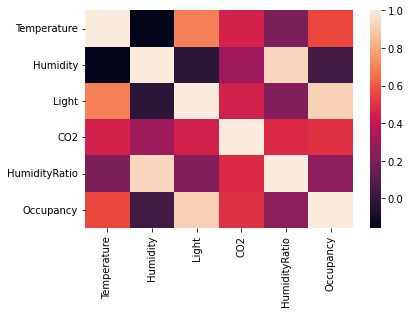

In [20]:
sns.heatmap(df3.corr())

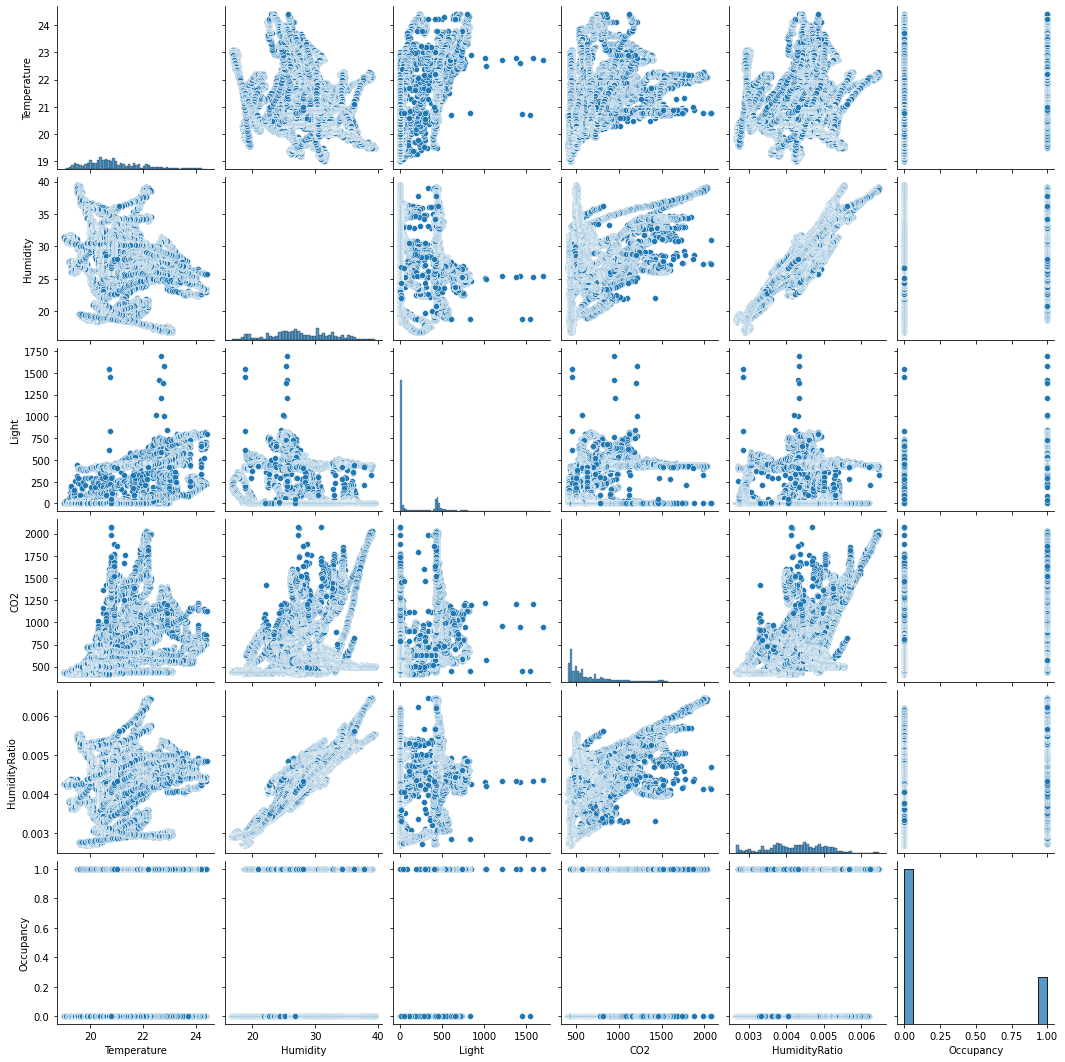

In [21]:
sns.pairplot(df3[['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']])

[Text(0.5, 1.0, 'CO2')]

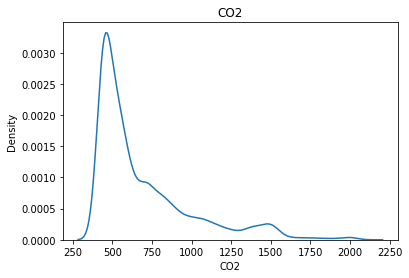

In [22]:
sns.kdeplot(df3['CO2']).set(title='CO2')

[Text(0.5, 1.0, 'Occupancy')]

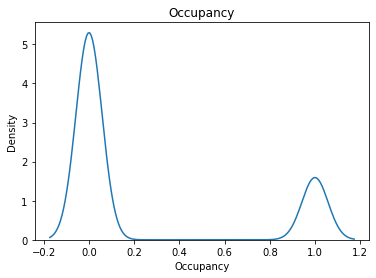

In [23]:
sns.kdeplot(df3['Occupancy']).set(title='Occupancy')

[Text(0.5, 1.0, 'Temperature')]

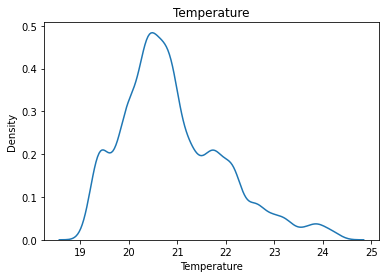

In [24]:
sns.kdeplot(df3['Temperature']).set(title='Temperature')

[Text(0.5, 1.0, 'Humidity')]

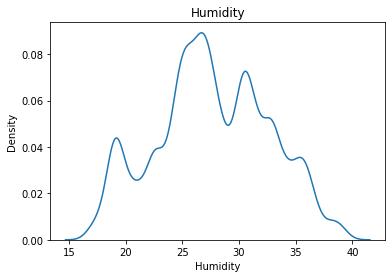

In [25]:
sns.kdeplot(df3['Humidity']).set(title='Humidity')

[Text(0.5, 1.0, 'HumidityRatio')]

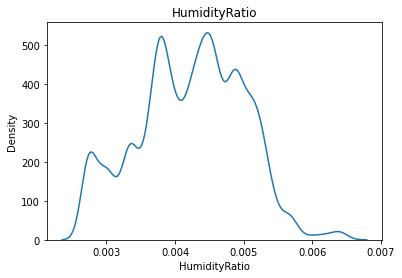

In [26]:
sns.kdeplot(df3['HumidityRatio']).set(title='HumidityRatio')

[Text(0.5, 1.0, 'Light')]

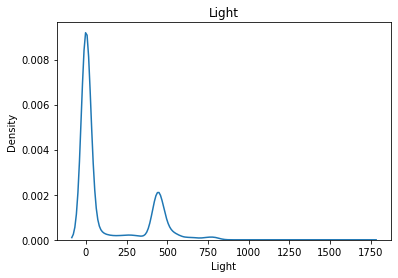

In [27]:
sns.kdeplot(df3['Light']).set(title='Light')

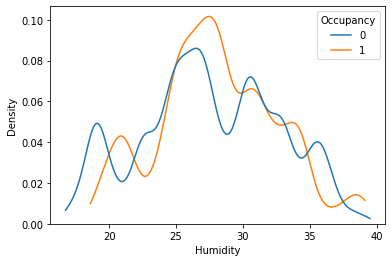

In [28]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

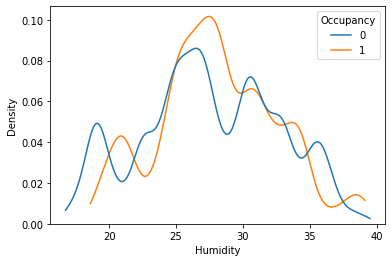

In [29]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

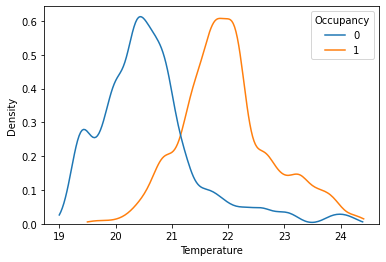

In [30]:
sns.kdeplot(data=df3, x="Temperature", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

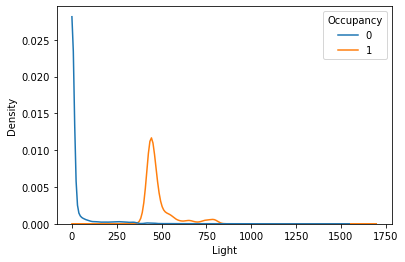

In [31]:
sns.kdeplot(data=df3, x="Light", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

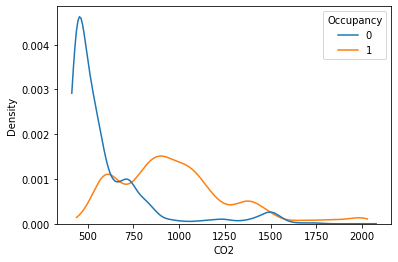

In [32]:
sns.kdeplot(data=df3, x="CO2", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

In [33]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


In [34]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [35]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
X=np.array(df4[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])
y=df4['Occupancy']
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.989 (0.002)


In [36]:
df3.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [37]:
clf = LogisticRegression(max_iter=20560).fit(X,y)

In [38]:
clf.predict(X)

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [39]:
clf.score(X,y)

0.9890077821011674

In [40]:
X

array([[2.37000000e+01, 2.62720000e+01, 5.85200000e+02, 7.49200000e+02,
        4.76416302e-03],
       [2.37180000e+01, 2.62900000e+01, 5.78400000e+02, 7.60400000e+02,
        4.77266099e-03],
       [2.37300000e+01, 2.62300000e+01, 5.72666667e+02, 7.69666667e+02,
        4.76515255e-03],
       ...,
       [2.08900000e+01, 2.77450000e+01, 4.23500000e+02, 1.52150000e+03,
        4.23681810e-03],
       [2.08900000e+01, 2.80225000e+01, 4.18750000e+02, 1.63200000e+03,
        4.27948547e-03],
       [2.10000000e+01, 2.81000000e+01, 4.09000000e+02, 1.86400000e+03,
        4.32073200e-03]])

In [41]:

# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat)

Predicted Class: 1


>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


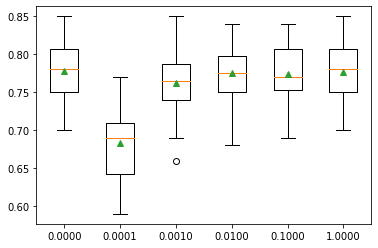

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [46]:
from sklearn.model_selection import train_test_split
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Occupancy'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Occupancy']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Occupancy']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==1])/len(os_data_X))

length of oversampled data is  22260
Number of no subscription in oversampled data 11130
Number of subscription 11130
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [47]:
df5=df3[df3.columns[-6:]]

In [48]:
df5

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4606   74]
 [  16 4790]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4680
           1       0.98      1.00      0.99      4806

    accuracy                           0.99      9486
   macro avg       0.99      0.99      0.99      9486
weighted avg       0.99      0.99      0.99      9486



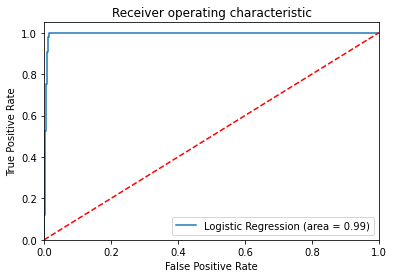

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data=df5

In [55]:
cat_vars=['Occupancy']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Occupancy']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [56]:
data_final=data[to_keep]
data_final.columns.values

array(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy_0', 'Occupancy_1'], dtype=object)

In [57]:
from sklearn.model_selection import train_test_split
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Occupancy'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Occupancy']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Occupancy']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==1])/len(os_data_X))

length of oversampled data is  22260
Number of no subscription in oversampled data 11130
Number of subscription 11130
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [58]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False]
[1 1 2 3 4]


In [59]:
cols=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'] 
X=os_data_X[cols]
y=os_data_y['Occupancy']

In [60]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.045905
         Iterations 23
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.934    
Dependent Variable:   Occupancy          AIC:                2053.6878
Date:                 2022-04-27 19:31   BIC:                2093.7405
No. Observations:     22260              Log-Likelihood:     -1021.8  
Df Model:             4                  LL-Null:            -15429.  
Df Residuals:         22255              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       23.0000                                         
----------------------------------------------------------------------
                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------
Temperature      -0.6415   0.0254 -25.2826 0.0000    -0.6913   -0.5918
Hu

In [61]:
cols=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       ] 
X=os_data_X[cols]
y=os_data_y['Occupancy']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.045905
         Iterations 23
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.934    
Dependent Variable:   Occupancy          AIC:                2053.6878
Date:                 2022-04-27 19:31   BIC:                2093.7405
No. Observations:     22260              Log-Likelihood:     -1021.8  
Df Model:             4                  LL-Null:            -15429.  
Df Residuals:         22255              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       23.0000                                         
----------------------------------------------------------------------
                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------
Temperature      -0.6415   0.0254 -25.2826 0.0000    -0.6913   -0.5918
Hu

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3218   51]
 [  13 3396]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3269
           1       0.99      1.00      0.99      3409

    accuracy                           0.99      6678
   macro avg       0.99      0.99      0.99      6678
weighted avg       0.99      0.99      0.99      6678



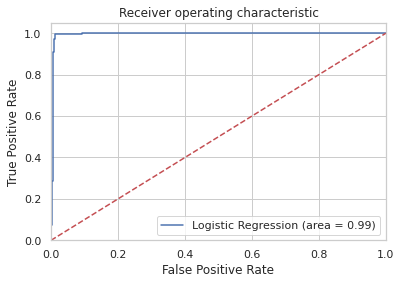

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df5, test_size=0.33)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 13775
No. of testing examples: 6785


In [71]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

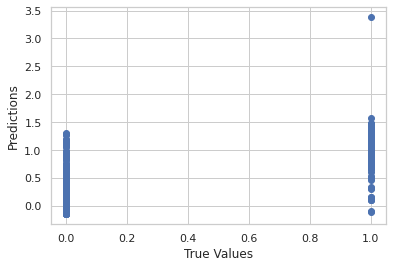

In [72]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [74]:
model.score(X_test, y_test)

0.9072442003514781

In [79]:
r2_score(y_true, y_pred)

NameError: name 'r2_score' is not defined

In [75]:
# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train.iloc[:5, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train.iloc[:5, :])

       Temperature  Humidity  Light          CO2  HumidityRatio
1071     20.666667   24.3900  419.0   584.666667       0.003670
19723    21.290000   34.2900    0.0  1469.000000       0.005376
2347     20.625000   24.4175    0.0   455.250000       0.003665
10891    21.890000   30.2300  429.0   789.333333       0.004913
15658    20.000000   35.7000    0.0   537.000000       0.005168
       Temperature  Humidity  Light          CO2  HumidityRatio
1071     20.666667   24.3900  419.0   584.666667       0.003670
19723    21.290000   34.2900    0.0  1469.000000       0.005376
2347     20.625000   24.4175    0.0   455.250000       0.003665
10891    21.890000   30.2300  429.0   789.333333       0.004913
15658    20.000000   35.7000    0.0   537.000000       0.005168


In [76]:
print(df5.iloc[[1071]])

      Temperature  Humidity  Light         CO2  HumidityRatio  Occupancy
1071    20.666667     24.39  419.0  584.666667        0.00367          1


In [77]:
# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_test.iloc[:5, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_test.iloc[:5, :])

       Temperature  Humidity   Light     CO2  HumidityRatio
16483      22.5000   29.5250   87.60  652.50       0.004981
4625       20.6000   19.3400    0.00  433.00       0.002895
14896      20.6250   35.7900  210.75  518.50       0.005387
213        22.4175   24.7475  419.00  796.75       0.004149
2052       20.8700   24.9780    0.00  543.80       0.003807
       Temperature  Humidity   Light     CO2  HumidityRatio
16483      22.5000   29.5250   87.60  652.50       0.004981
4625       20.6000   19.3400    0.00  433.00       0.002895
14896      20.6250   35.7900  210.75  518.50       0.005387
213        22.4175   24.7475  419.00  796.75       0.004149
2052       20.8700   24.9780    0.00  543.80       0.003807


In [78]:
print(df5.iloc[[213]])

     Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
213      22.4175   24.7475  419.0  796.75       0.004149          0


In [ ]:
binary_landsat_train = df4.query("land_type==1 | land_type==3")
binary_landsat_test = df4.query("land_type==1 | land_type==3")

In [ ]:
X_test = np.array(df4.iloc[:,0:36])
y_test = np.array(df4.iloc[:,-1])

In [ ]:
X_train = np.array(df4.iloc[:,0:36])
y_train = np.array(df4.iloc[:,-1])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_test, y_test)

In [ ]:
X_test = np.array(binary_landsat_test.iloc[:,0:36])
y_test = np.array(binary_landsat_test.iloc[:,-1])

In [ ]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(5,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')

In [ ]:
df4.columns

In [ ]:
y=df4['Occupancy']

In [ ]:
df3.Occupancy.groupby(df3.Occupancy).count()

In [ ]:
df4.Occupancy.groupby(df4.Occupancy).count()

In [ ]:
X = np.array(df3[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

In [ ]:
clf = LogisticRegression(max_iter=1000).fit(X,y)

In [ ]:
clf.predict(X)

In [ ]:
df4.head(3)

In [ ]:
df4.tail(3)

In [ ]:
clf.score(X,y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(df3[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])

In [ ]:
enc.categories